What is Ensemble Learning?
Ensemble learning is a machine learning technique where multiple models (called "learners") are combined to solve the same problem and improve overall performance.
Think of it as using a team of models rather than a single one — just like getting a second opinion from several experts instead of trusting one.

| Ensemble Method | Description                                                                                                                   | Common Algorithms Used                                                                                                                                 |
| --------------- | ----------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Bagging**     | Train multiple models independently on different subsets of data (with replacement). Combine outputs (e.g., average, vote).   | ✅ **Random Forest** (based on Decision Trees)<br>✅ Bagging Classifier<br>✅ Bagging Regressor                                                           |
| **Boosting**    | Train models sequentially. Each new model focuses on correcting the errors of the previous one.                               | ✅ **AdaBoost**<br>✅ **Gradient Boosting**<br>✅ **XGBoost**<br>✅ **LightGBM**<br>✅ **CatBoost**                                                         |
| **Stacking**    | Train multiple models (base learners) and then train a final model (meta-learner) on their outputs.                           | ✅ Any mix: Logistic Regression, Random Forest, SVM, KNN, etc.<br>✅ Meta-model often: Logistic Regression or XGBoost                                    |
| **Voting**      | Train different models in parallel and combine predictions via majority (hard voting) or average probabilities (soft voting). | ✅ Any classifiers like:<br>- Logistic Regression<br>- Decision Tree<br>- SVM<br>- KNN<br>- Naive Bayes<br>✅ Use **VotingClassifier** from scikit-learn |
     


| Method   | Model Types Used                          | Main Goal                 |
| -------- | ----------------------------------------- | ------------------------- |
| Bagging  | Mostly **Decision Trees** (Random Forest) | Reduce variance           |
| Boosting | **Weak learners** (often shallow trees)   | Reduce bias               |
| Stacking | **Any mix of models** + meta-model        | Combine diverse strengths |
| Voting   | **Different models**, equal weight        | Simple, robust ensemble   |


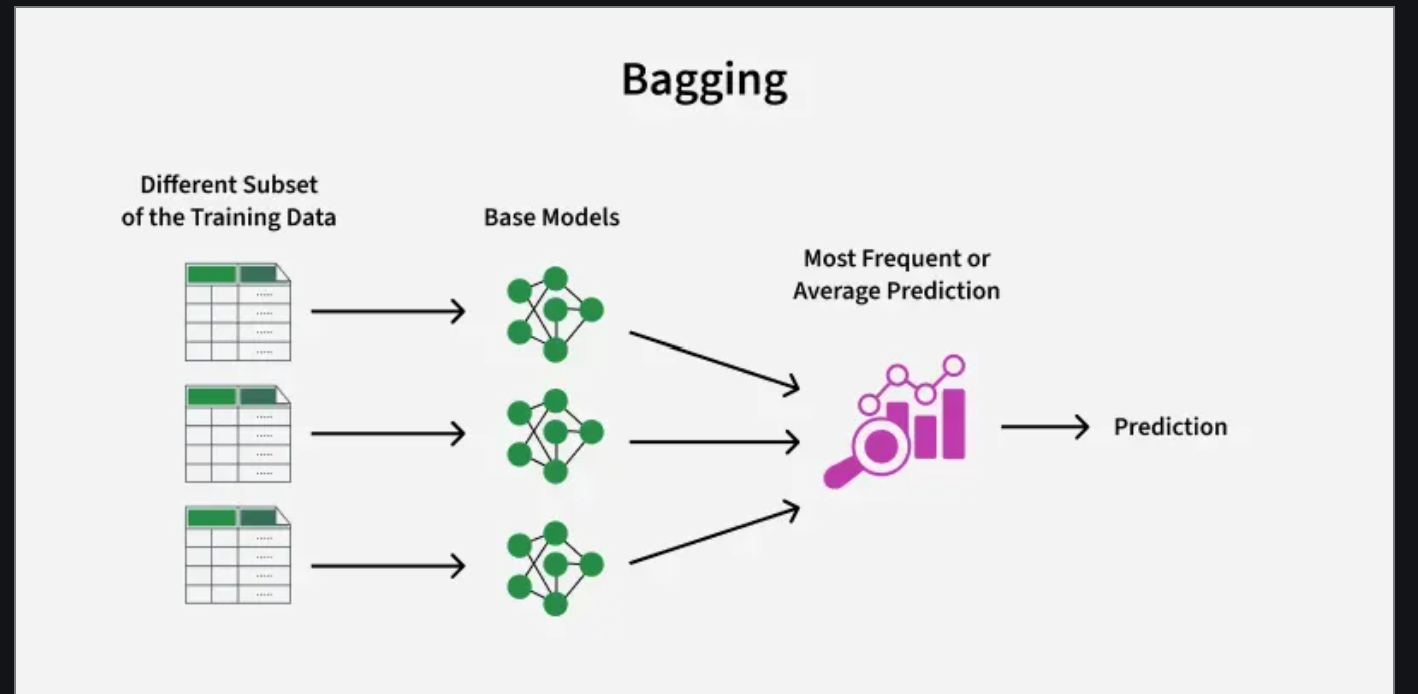

## Bagging

In [3]:
import pandas as pd

In [5]:
df_bg = pd.read_csv('C:\\Users\\rahul\\Data Science\\Material\\Social_Network_Ads.csv')
x = df_bg.iloc[:, [2, 3]].values
y = df_bg.iloc[:, -1].values
df_bg.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators = 10) #n_estimators=10 creates 10 decision trees. 
#Each tree is trained on a different random subset of the original dataset (with replacement), not on 1/10 of the data.

In [14]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [16]:
y_pred = model_rfc.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"confusion matrix:\n", confusion_matrix(y_test,y_pred))

confusion matrix:
 [[66  2]
 [ 4 28]]


In [20]:
print(f"classification Report:\n", classification_report(y_test,y_pred))

classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.93      0.88      0.90        32

    accuracy                           0.94       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.94      0.94      0.94       100



## Bagging classifier, using KNN model as base classifier

In [22]:
df_knn = pd.read_csv('C:\\Users\\rahul\\Data Science\\Material\\Social_Network_Ads.csv')
x = df_knn.iloc[:, [2, 3]].values
y = df_knn.iloc[:, -1].values
df_knn.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

model_bag = BaggingClassifier(estimator = KNeighborsClassifier(),n_estimators=10,random_state=42)

#BaggingClassifier will create 10 different bootstrap samples (because estimators=10).
#Each of the 10 KNN classifiers is trained on a different bootstrap sample.

In [29]:
model_bag.fit(x_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), random_state=42)

In [30]:
y_pred = model_bag.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"confusion matrix:\n", confusion_matrix(y_test,y_pred))

confusion matrix:
 [[59  9]
 [10 22]]


In [32]:
print(f"classification Report:\n", classification_report(y_test,y_pred))

classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        68
           1       0.71      0.69      0.70        32

    accuracy                           0.81       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.81      0.81      0.81       100



comparison b/w Random forest and KNN

| Metric                    | Bagging with Random Forest | Bagging with KNN |
| ------------------------- | -------------------------- | ---------------- |
| **Accuracy**              | 94%                        | 81%              |
| **Precision (class 0)**   | 94%                        | 86%              |
| **Recall (class 0)**      | 97%                        | 87%              |
| **F1-score (class 0)**    | 96%                        | 86%              |
| **Precision (class 1)**   | 93%                        | 71%              |
| **Recall (class 1)**      | 88%                        | 69%              |
| **F1-score (class 1)**    | 90%                        | 70%              |
| **Macro avg F1-score**    | 93%                        | 78%              |
| **Weighted avg F1-score** | 94%                        | 81%              |


🧠 Final Summary:
✅ Bagging with Random Forest is clearly the better-performing model here — more accurate, more balanced, and better at handling both classes.

⚠️ Bagging with KNN might be overfitting or not generalizing well, especially for the minority class (class 1).


## Boosting

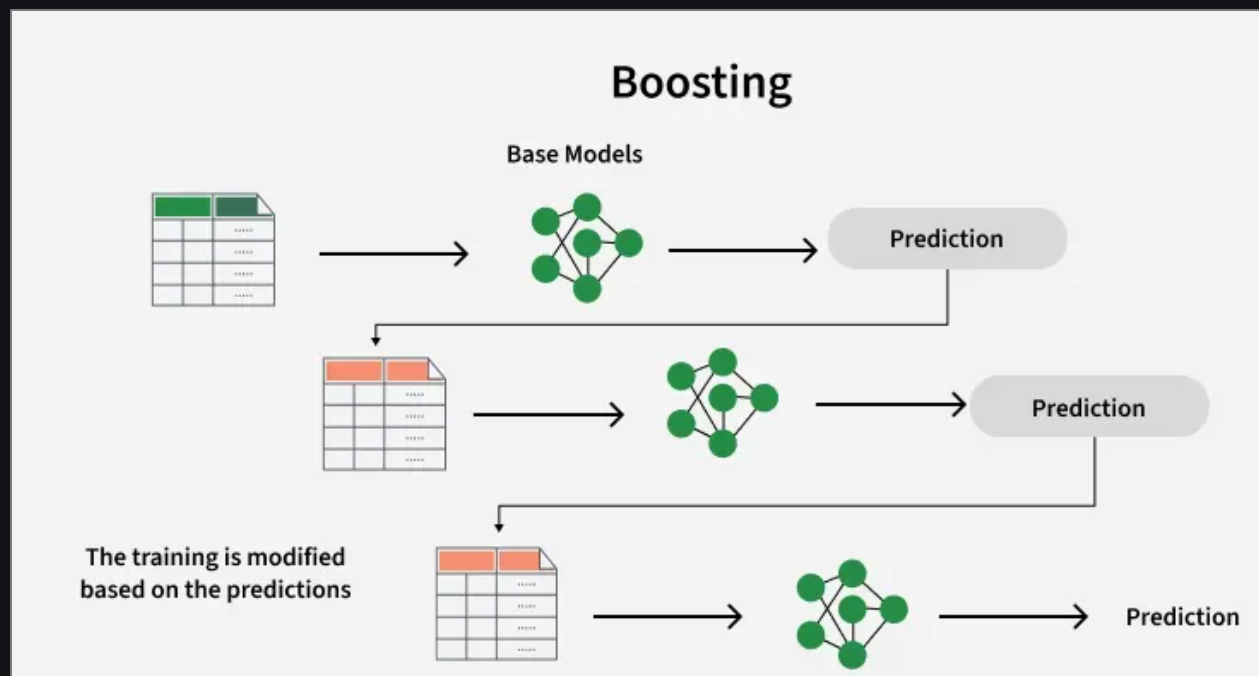

In [33]:
import pandas as pd

In [35]:
df_bos = pd.read_csv('C:\\Users\\rahul\\Data Science\\Material\\Social_Network_Ads.csv')
x = df_bos.iloc[:, [2, 3]].values
y = df_bos.iloc[:, -1].values
df_bos.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(n_estimators = 10, random_state = 0)
#By default, GradientBoostingClassifier uses a Decision Tree Regressor with depth = 3 (a shallow decision tree when depth is 1 to 3) as its base learner.

In [45]:
model_gbc.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=10, random_state=0)

In [46]:
y_pred = model_gbc.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"confusion matrix:\n", confusion_matrix(y_test,y_pred))

confusion matrix:
 [[58  5]
 [ 3 34]]


In [48]:
print(f"classification Report:\n", classification_report(y_test,y_pred))

classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.87      0.92      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Using a deeper tree instead of a stump
model_abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                           n_estimators=50,
                           random_state=0)
#You’re building 50 shallow decision trees, each of depth 3.

In [58]:
model_abc.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   random_state=0)

In [59]:
y_pred = model_abc.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"confusion matrix:\n", confusion_matrix(y_test,y_pred))

confusion matrix:
 [[58  5]
 [ 5 32]]


In [61]:
print(f"classification Report:\n", classification_report(y_test,y_pred))

classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        63
           1       0.86      0.86      0.86        37

    accuracy                           0.90       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



## Stacking

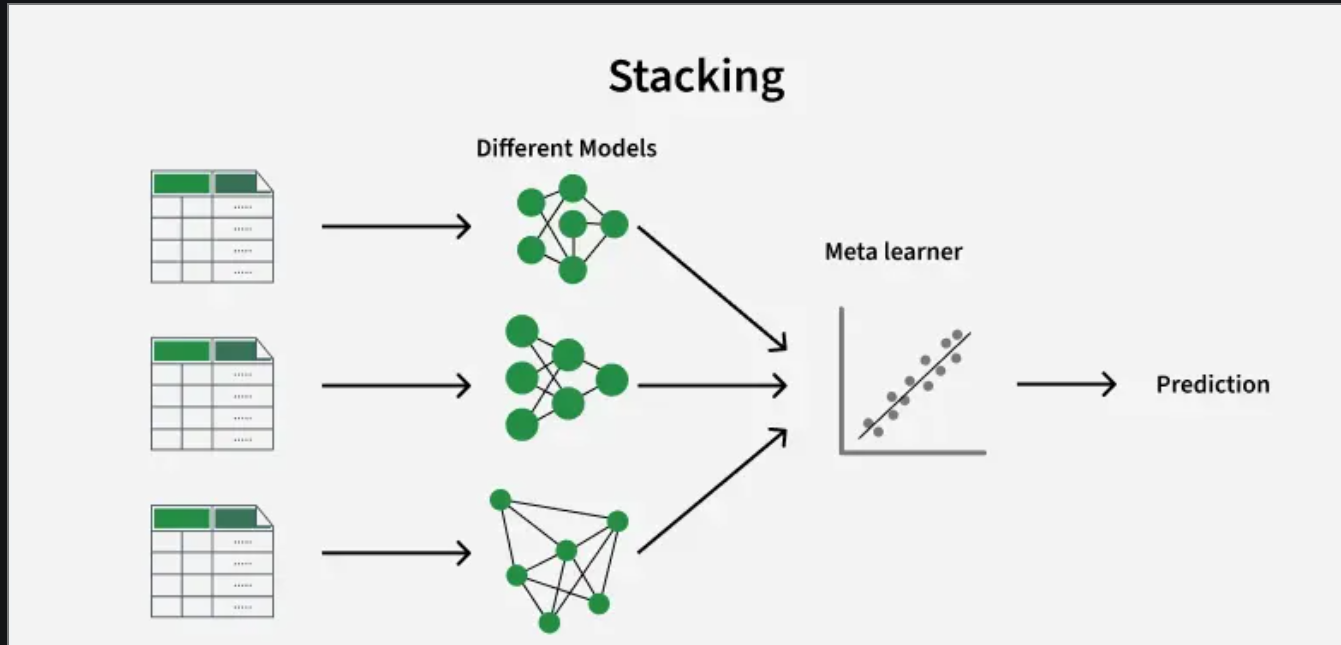

In [63]:
import pandas as pd

In [64]:
df_st = pd.read_csv('C:\\Users\\rahul\\Data Science\\Material\\Social_Network_Ads.csv')
x = df_st.iloc[:, [2, 3]].values
y = df_st.iloc[:, -1].values
df_st.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [66]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [67]:
# Define base learners
base_learners = [('knn', KNeighborsClassifier(n_neighbors=5)),('dt', DecisionTreeClassifier(max_depth=3, random_state=42))]

In [68]:
# Define meta learner (final estimator)
meta_learner = LogisticRegression()

In [69]:
# Create stacking classifier
model_stack = StackingClassifier(estimators=base_learners,final_estimator=meta_learner,cv=5)
#The cv=5 refers,The training data is split into 5 equal parts (folds).Each base model is trained on 4 folds and makes predictions on the remaining 1 fold.

In [70]:
model_stack.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('dt',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

In [71]:
y_pred = model_stack.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"confusion matrix:\n", confusion_matrix(y_test,y_pred))

confusion matrix:
 [[57  6]
 [ 5 32]]


In [73]:
print(f"classification Report:\n", classification_report(y_test,y_pred))

classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.84      0.86      0.85        37

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



## Voting

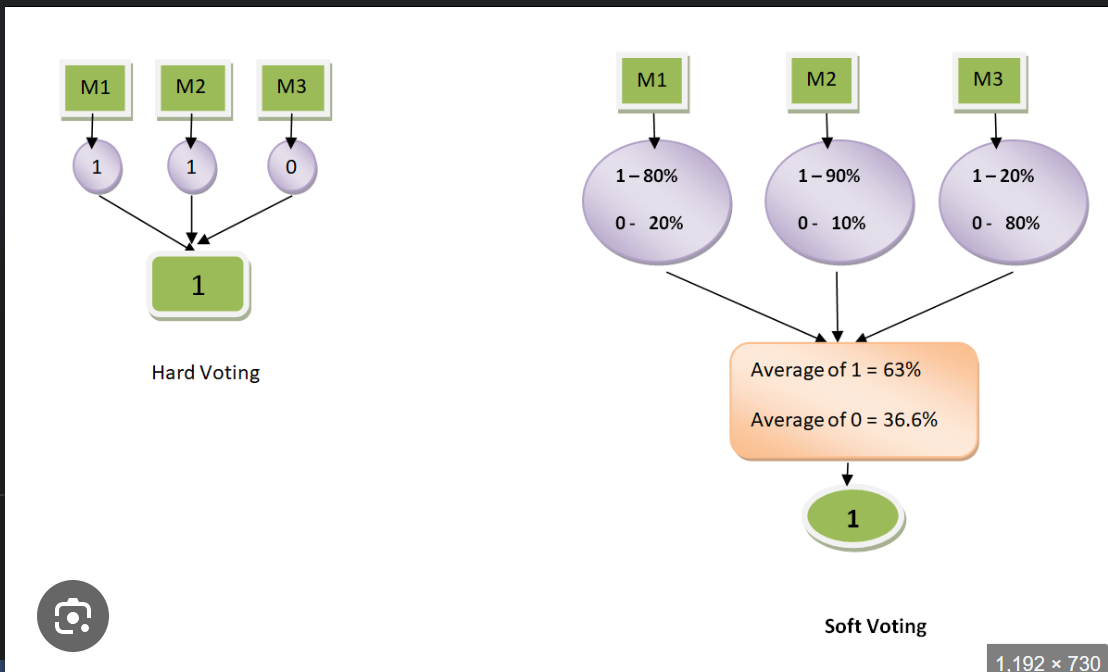

In [74]:
import pandas as pd

In [75]:
df_vt = pd.read_csv('C:\\Users\\rahul\\Data Science\\Material\\Social_Network_Ads.csv')
x = df_vt.iloc[:, [2, 3]].values
y = df_vt.iloc[:, -1].values
df_vt.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [77]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [85]:
model1 =LogisticRegression()
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier(n_estimators = 10)

In [86]:
model = VotingClassifier(estimators = [('lr',model1),('kn',model2),('rf',model3)], voting='soft')

In [87]:
model.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('kn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(n_estimators=10))],
                 voting='soft')

In [88]:
y_pred = model.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"confusion matrix:\n", confusion_matrix(y_test,y_pred))

confusion matrix:
 [[57  6]
 [ 3 34]]


In [90]:
print(f"classification Report:\n", classification_report(y_test,y_pred))

classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.85      0.92      0.88        37

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100

